In [1]:
# pytorch is just numpy on the GPU with some nice helper functions. But I run on CPU now.
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
# Tensor is basically a multi dimentional array.

print(x * y)

tensor([10.,  3.])


In [2]:
x = torch.zeros([2,5])
print(x)
print(x.shape)  #again, similar to numpy

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [3]:
y = torch.rand([2,5])
print(y)

tensor([[0.2683, 0.2824, 0.4194, 0.7778, 0.8538],
        [0.7725, 0.4066, 0.9469, 0.8262, 0.0526]])


In [4]:
# lets say we want to flatten a Tensor since we cant give input such as [2,5]. We must flatten it.
y = y.view([1,10])  #flattened
print(y)

tensor([[0.2683, 0.2824, 0.4194, 0.7778, 0.8538, 0.7725, 0.4066, 0.9469, 0.8262,
         0.0526]])


SECOND STAGE STARTS - DATA

In [5]:
import torchvision
from torchvision import transforms, datasets

In [6]:
train = datasets.MNIST("", train = True, download = True,
                        transform=transforms.Compose([transforms.ToTensor()])) #convert it to Tensor
test =  datasets.MNIST("", train = False, download = True,
                        transform=transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [28]:
# lets iterate over trainset
for data in trainset:
    print(data)  #10 examples of handwritten digits (batch size) and 10 tensor outputs (they represent the digits)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [31]:
x, y = data[0][0] , data[1][0] # first image, its output
print(y)

tensor(1)


torch.Size([1, 28, 28])


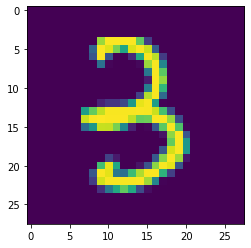

In [10]:
import matplotlib.pyplot as plt
print(data[0][0].shape)  # not suitable for visualizing
plt.imshow(data[0][0].view(28,28)) # change the shape

In [11]:
#check if this is an imbalanced dataset, count values using counter dictionary, keys represent outputs, values represent the count
from itertools import count

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
# to get the percentages
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")  #it seems balanced dataset

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


STAGE 3 STARTS - BUILDING NEURAL NETWORK

In [13]:
import torch.nn as nn
import torch.nn.functional as F  #these two things are very similar

In [14]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()  # super corresponds to nn.module inherit init
        self.fc1 = nn.Linear(28*28, 64) # input size, output size
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) # we have 10 classes
    
    def forward(self,x):  #how the data will flow through the network?
         x = F.relu(self.fc1(x))  # x passes through fc1, relu is the activation function
         x = F.relu(self.fc2(x))
         x = F.relu(self.fc3(x))
         x = self.fc4(x)
         #you can insert if,elif, and else here

         return F.log_softmax(x, dim=1) 

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
# pass some data through the neural network
X = torch.rand((28,28))
X

tensor([[3.9168e-01, 6.2544e-01, 6.3816e-01, 6.9090e-01, 8.8103e-01, 3.1751e-01,
         5.1337e-01, 8.4888e-01, 6.8696e-01, 8.0738e-01, 4.3766e-01, 8.6044e-01,
         2.4123e-01, 9.7839e-01, 6.1964e-01, 2.9520e-01, 9.2732e-01, 9.8295e-01,
         7.8063e-01, 4.2812e-01, 7.9855e-01, 4.4886e-01, 1.1684e-01, 4.7033e-01,
         1.9934e-02, 7.6687e-02, 6.5674e-01, 6.4605e-01],
        [4.4360e-01, 2.3020e-01, 9.5998e-01, 4.0845e-02, 2.2815e-01, 8.1841e-01,
         9.5970e-01, 6.5290e-01, 5.8361e-02, 6.9406e-01, 2.6632e-01, 5.5399e-01,
         7.7287e-01, 2.5812e-01, 7.8319e-01, 2.0831e-01, 1.9082e-01, 4.2450e-01,
         4.9026e-01, 5.9926e-01, 6.9222e-01, 7.6015e-02, 4.2663e-01, 2.0250e-01,
         8.7123e-01, 1.6299e-01, 5.3679e-03, 5.8336e-01],
        [1.8591e-01, 3.6118e-01, 8.1141e-01, 1.6246e-02, 6.3969e-01, 7.2126e-01,
         5.6313e-01, 2.6382e-01, 1.3321e-01, 6.3754e-01, 4.5354e-01, 1.2221e-01,
         2.2849e-02, 4.2159e-01, 9.7971e-01, 8.4652e-01, 9.7894e-01, 2.580

In [16]:
output = net(X.view(-1,28*28)) # 1 or -1 mean the given parameter can be any size
print(output)

tensor([[-2.3615, -2.3141, -2.3626, -2.1644, -2.3402, -2.3255, -2.2435, -2.3666,
         -2.3628, -2.2092]], grad_fn=<LogSoftmaxBackward0>)


FORTH STAGE STARTS HERE - TRAINING MODEL

In [17]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
print(optimizer)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data 
        net.zero_grad() # batch our data: decrease the training time
        output = net(X.view(-1,28*28))  #insert input and get the output
        loss = F.nll_loss(output, y)  #calculate loss, negative likelihood : cross entropy
        loss.backward()   #backpropagation
        optimizer.step()
    print(loss) # with 3 epochs, the loss is going down

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
tensor(0.7108, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)


In [18]:
#validation
correct = 0
total = 0
with torch.no_grad():  #no gradient, do not optimize, for test data
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct/total, 3))

Accuracy: 0.969


torch.Size([1, 28, 28])


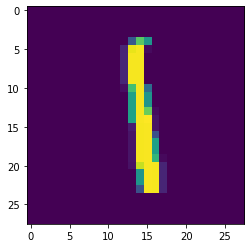

In [19]:
print(X[6].shape)
plt.imshow(X[6].view(28,28))
plt.show()

In [20]:
print(torch.argmax(net(X[6].view(-1,28*28))))  #the prediction is right

tensor(1)


FIFTH STAGE STARTS HERE - CONVOLUTIONAL NEURAL NETWORK INTRO

In [21]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50  #we will resize images as 50x50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0  #we always need to be aware of the balance

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):  #directory of label
                try:

                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #does not take colors into account
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE)) #resize 50x50
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    if label == self.DOGS:
                        self.dogcount += 1
                except Exception as e: 
                    print(str(e))
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcatts = DogsVSCats()
    dogsvcatts.make_training_data()

PetImages/Cat


  4%|▍         | 517/12501 [00:00<00:11, 1083.88it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 13%|█▎        | 1569/12501 [00:01<00:09, 1158.23it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 15%|█▌        | 1913/12501 [00:01<00:09, 1108.37it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 18%|█▊        | 2257/12501 [00:02<00:09, 1129.00it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 21%|██        | 2609/12501 [00:02<00:08, 1147.34it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 27%|██▋       | 3321/12501 [00:02<00:08, 1102.48it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 30%|███       | 3755/12501 [00:03<00:08, 1046.43it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 32%|███▏      | 3975/12501 [00:03<00:07, 1069.68it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 36%|███▌      | 4520/12501 [00:04<00:07, 1004.78it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 39%|███▉      | 4854/12501 [00:04<00:07, 1075.12it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 44%|████▍     | 5551/12501 [00:05<00:05, 1158.37it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 51%|█████     | 6399/12501 [00:05<00:05, 1157.63it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 53%|█████▎    | 6645/12501 [00:05<00:04, 1190.66it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 58%|█████▊    | 7250/12501 [00:06<00:04, 1179.46it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 63%|██████▎   | 7877/12501 [00:07<00:03, 1221.58it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 67%|██████▋   | 8378/12501 [00:07<00:03, 1237.64it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 70%|██████▉   | 8749/12501 [00:07<00:03, 1219.01it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 84%|████████▎ | 10455/12501 [00:09<00:01, 1197.06it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 92%|█████████▏| 11561/12501 [00:10<00:00, 1207.33it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 12501/12501 [00:10<00:00, 1150.52it/s]


PetImages/Dog


  4%|▍         | 488/12501 [00:00<00:12, 981.55it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 10%|█         | 1269/12501 [00:01<00:10, 1114.17it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 21%|██        | 2606/12501 [00:02<00:09, 1090.59it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 23%|██▎       | 2824/12501 [00:02<00:09, 1073.98it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 31%|███       | 3898/12501 [00:03<00:08, 1062.46it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 37%|███▋      | 4682/12501 [00:04<00:06, 1120.45it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 41%|████      | 5132/12501 [00:04<00:06, 1103.65it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 49%|████▉     | 6150/12501 [00:05<00:05, 1129.63it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 51%|█████     | 6376/12501 [00:05<00:05, 1103.40it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 55%|█████▍    | 6823/12501 [00:06<00:05, 1097.26it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 57%|█████▋    | 7150/12501 [00:06<00:05, 1063.29it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 64%|██████▍   | 8043/12501 [00:07<00:04, 1103.11it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 69%|██████▉   | 8608/12501 [00:08<00:03, 1121.34it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 71%|███████   | 8843/12501 [00:08<00:03, 1138.93it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 74%|███████▍  | 9306/12501 [00:08<00:02, 1152.35it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
 84%|████████▎ | 10453/12501 [00:09<00:01, 1097.81it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
 85%|████████▌ | 10674/12501 [00:09<00:01, 1099.29it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 90%|████████▉ | 11233/12501 [00:10<00:01, 1094.41it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 99%|█████████▉| 12373/12501 [00:11<00:00, 1084.93it/s]

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 12501/12501 [00:11<00:00, 1082.51it/s]
/Users/hamzagorgulu/Library/Python/3.8/lib/python/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Cats:  12476
Dogs:  12470


In [32]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))
print(training_data[0]) # dog

24946
[array([[200, 191, 161, ...,  87,  89,  87],
        [198, 172, 209, ...,  85,  88,  83],
        [200, 198, 208, ...,  82,  80,  79],
        ...,
        [ 89, 116,  90, ...,  63,  61,  60],
        [ 64,  99,  93, ...,  59,  63,  63],
        [ 65, 105, 145, ...,  61,  65,  73]], dtype=uint8) array([0., 1.])]


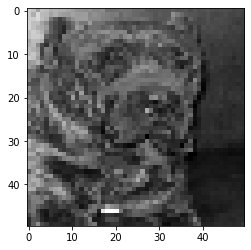

In [33]:
plt.imshow(training_data[0][0], cmap = "gray")
plt.show()  #grayscaled image

SIXTH STAGE STARTS HERE - TRAINING CONVNET

In [35]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)  # 2 dim conv layer, 5 is kernel size
        self.conv2 = nn.Conv2d(32, 64, 5)  # the prev. example was Linear layer
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)

        #self.fc1 = nn.Linear( , 512)
        #self.fc2 = nn.Linear(512, 2)
    def convs(self, x):  #about the size
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2,))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2,))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2,))
        print(x[0].shape)

        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x) #pass through all of the conv layers
        x = x.view(-1, self._to_linear)  #flatten it
        x = F.relu(self.fc1(x))  # pass through first fc1
        x = self.fc2(x)  # pass through fc2
        return x
net = Net()

#in the later, it trains the model and get result, nothing new

torch.Size([128, 2, 2])


SEVENTH STAGE STARTS HERE - GPUs